In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r_low = 1.0
r_high = 2.0
N = 32

In [3]:
epsilon = 1.0
sigma = 1.0

def E(r):
    r6 = (sigma / r)**6
    return 4.0 * epsilon * (r6 * r6 - r6)

def dEdr(r):
    r6 = (sigma / r)**6
    return -48.0 * epsilon * (r6 * r6 - 0.5 * r6) / r

<IPython.core.display.Javascript object>


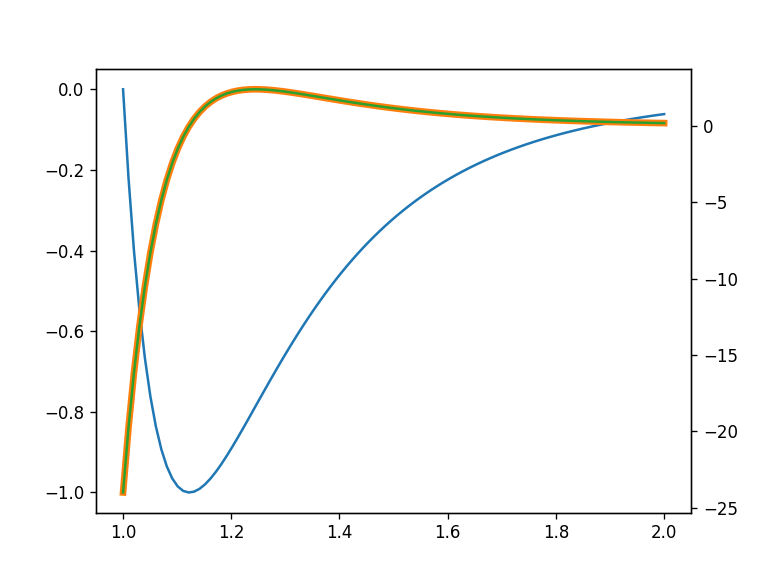

In [4]:
X = np.linspace(1.0, 2.0, 100)
Y1 = E(X)
Y2 = dEdr(X)
h = 0.001
Y3 = (E(X + h) - E(X - h)) / (2 * h)
fig, ax1 = plt.subplots()
ax1.plot(X, Y1, 'C0-')
ax2 = ax1.twinx()
ax2.plot(X, Y2, 'C1-', lw=4)
ax2.plot(X, Y3, 'C2-')

In [5]:
#r_list = np.array([r_low + (r_high - r_low) * np.random.uniform() for i in range(N)])
r_list = np.linspace(r_low, r_high, num=N)
E_list = E(r_list)
dEdr_list = dEdr(r_list)
len(r_list)

32

<IPython.core.display.Javascript object>


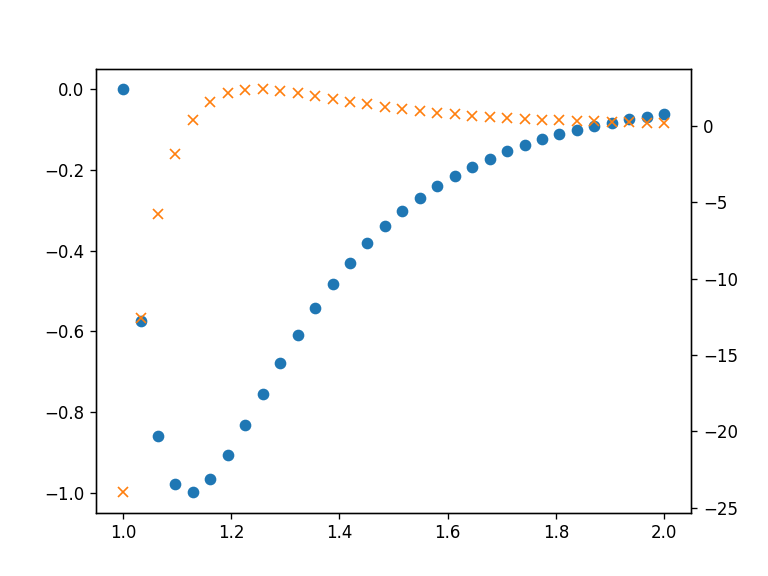

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(r_list, E_list, 'C0o')
ax2 = ax1.twinx()
ax2.plot(r_list, dEdr_list, 'C1x')

In [7]:
with open("input.data", "w") as f:
    for i in range(N):
        r = r_list[i]
        f.write("begin\n")
        x = r / np.sqrt(3.0)
        y = x
        z = x
        fx = dEdr_list[i] / np.sqrt(3.0)
        fy = fx
        fz = fx
        f.write("atom {0:16.8E} {1:16.8E} {2:16.8E} {3:2s} {4:16.8E} {5:16.8E} {6:16.8E} {7:16.8E} {8:16.8E}\n".format(
                0.0, 0.0, 0.0, "H", 0.0, 0.0, fx, fy, fz))
        f.write("atom {0:16.8E} {1:16.8E} {2:16.8E} {3:2s} {4:16.8E} {5:16.8E} {6:16.8E} {7:16.8E} {8:16.8E}\n".format(
                x, y, z, "H", 0.0, 0.0, -fx, -fy, -fz))
        f.write("energy {0:16.8E}\n".format(E_list[i]))
        f.write("comment r = {0:16.8E}, E = {1:16.8E}, dEdr = {2:16.8E}\n".format(r, E_list[i], dEdr_list[i]))
        f.write("end\n")